In [43]:
#Introducción:
# El concepto de abandono o “churn” de clientes, definido como la cantidad de 
# consumidores que deja de contratar un servicio en un periodo determinado de tiempo ha 
# cobrado mucha importancia en el último tiempo. Entender cuáles son los principales 
# motivos por los que un cliente decide dar de baja el servicio se considera una habilidad 
# fundamental dentro de la inteligencia de mercado puesto que permite a las empresas 
# tomar acciones de negocio oportunas para retener al cliente y anticiparse de esa forma 
# a posibles pérdidas. Si bien un análisis retrospectivo de tipo diagnóstico puede ser de 
# utilidad en una primera instancia para aproximarse a las causas del “churn”, para poder 
# explotar el concepto de forma completa se requieren herramientas analíticas 
# adicionales, particularmente aquellas que permitan hacer un análisis de tipo predictivo. 
# Es aquí donde la Ciencia de Datos, mediante el uso de algoritmos de clasificación 
# predictivos como el Machine Learning  (ML) se vuelve una disciplina sumamente 
# atractiva para ser incorporada dentro del stack tecnológico del buiseness intelligence. 

#Objetivo:
# El objetivo del proyecto es tratar de encontrar cuáles son las características de un cliente 
# relacionadas con sus variables demográficas y sus hábitos de consumo que nos permitan establecer
# un perfil con altas probabilidades de abandonar.

#Hipótesis:
#1. El principal motivo por el cual un cliente abandona un servicio de telecomunicaciones es por el costo del mismo.
#2. A mayor consumo del servicio (Ej. consumo de internet para descargar películas, TV o música), es menor la tendencia al abandono.
#3. Los clientes que contratan el servicio por mes tienen mayor tendencia al abandono que aquellos que realizan contratos a  plazos más largos.
#4. Cuanto más antigua sea la relación del cliente con la empresa, hay menor tendencia al abandono.

In [44]:
import pandas as pd

In [45]:
df_original = pd.read_csv("C:/Users/agus_/OneDrive/Documentos/Curso_Data_Science_1_CH/Desafio_1_Datasets_potenciales/Dataset_3/archive (4)/telecom_customer_churn.csv")
df = df_original.copy()

In [46]:
df.info()
lista_columnas = df.columns
print(lista_columnas)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [47]:
df["Customer ID"].is_unique
#No hay clientes duplicados

True

In [48]:
#Existen 3 categorías para la variable target: 
#-Churn: son aquellos clientes que abandonaron en el último cuatrimestre
#-Stayed: son aquellos clientes que permanecieron en relación con la empresa en el último cuatrimestre
#-Joined: son aquellos que se incorporaron a la empresa en el último cuatrimestre.
#Elimino la categoría Joined (6% del total de registros) porque son clientes que no abandonaron porque recien se unieron a la empresa y no se les dio el tiempo suficiente para abandonar: 
df.drop(df[df["Customer Status"]=="Joined"].index, inplace=True)
total_churn = df["Customer ID"][df["Customer Status"] == "Churned"].count()
total_stay = df["Customer ID"][df["Customer Status"] == "Stayed"].count()
total_join = df["Customer ID"][df["Customer Status"] == "Joined"].count()
data = {"Churn":total_churn, "Stayed":total_stay, "Joined":total_join}
df_customer_status = pd.DataFrame(data, index=[0])
print(df_customer_status)
#Se observa desbalance entre las variables target.


   Churn  Stayed  Joined
0   1869    4720       0


In [49]:
#Evaluo cantidad de valores nulos por variable
lista_null = []
for i in lista_columnas:
 df_f = df[i]
 null_count = df_f.isnull().sum().sum()
 lista_null.append(null_count)
df_null = {"variable":lista_columnas, "null": lista_null}
df_null = pd.DataFrame(df_null)
print(df_null)

                             variable  null
0                         Customer ID     0
1                              Gender     0
2                                 Age     0
3                             Married     0
4                Number of Dependents     0
5                                City     0
6                            Zip Code     0
7                            Latitude     0
8                           Longitude     0
9                 Number of Referrals     0
10                   Tenure in Months     0
11                              Offer  3598
12                      Phone Service     0
13  Avg Monthly Long Distance Charges   644
14                     Multiple Lines   644
15                   Internet Service     0
16                      Internet Type  1344
17            Avg Monthly GB Download  1344
18                    Online Security  1344
19                      Online Backup  1344
20             Device Protection Plan  1344
21               Premium Tech Su

In [50]:
no_phone = df["Customer ID"][df["Phone Service"]=="No"].count()
no_internet = df["Customer ID"][df["Internet Service"]=="No"].count()
data1 = {"Sin telefonía":no_phone, "Sin internet":no_internet}
df_servicios = pd.DataFrame(data1, index=[0])
print(df_servicios)
#Los nulos en "Avg Monthly Long Distance Charges" y en "Multiple Lines" se corresponden a los clientes que no contrataron telefonía
#Los nulos en Internet Type, Avg Monthly GB Download  , Online Security  , Online Backup,
#Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music yUnlimited Data se
#corresponden con clientes  que no contrataron servicio de internet.
#Reemplazo esos valores por la variable "NC" (no corresponde)
df["Avg Monthly Long Distance Charges"].fillna(0, inplace=True)
df["Multiple Lines"].fillna("NC", inplace=True)
df["Internet Type"].fillna("NC", inplace=True)
df["Avg Monthly GB Download"].fillna(0, inplace=True)
df["Online Security"].fillna("NC", inplace=True)
df["Online Backup"].fillna("NC", inplace=True)
df["Device Protection Plan"].fillna("NC", inplace=True)
df["Premium Tech Support"].fillna("NC", inplace=True)
df["Streaming TV"].fillna("NC", inplace=True)
df["Streaming Movies"].fillna("NC", inplace=True)
df["Offer"].fillna("NC", inplace=True)



   Sin telefonía  Sin internet
0            644          1344


C:\Users\agus_\AppData\Local\Temp\ipykernel_24404\812033155.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Avg Monthly Long Distance Charges"].fillna(0, inplace=True)
C:\Users\agus_\AppData\Local\Temp\ipykernel_24404\812033155.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [51]:
#Los nulos en las variables Churn Category y Churn Reason se corresponden con los clientes que no abandonaron.

In [52]:
#Separamos las variables numéricas y las categóricas
lista_variables_categoricas = []
lista_variables_numericas = []
for i in lista_columnas:
  if df.dtypes[i] == "object":
    lista_variables_categoricas.append(i)
  else:
    lista_variables_numericas.append(i)
#Considero que "number of dependents" se deberia tratar como una variable categorica
lista_variables_numericas.remove("Number of Dependents")
lista_variables_categoricas.append("Number of Dependents")

# Exploratory Data Analysis (EDA)

In [53]:

#Bucle para calcular el porcentaje de clientes que abandonaron por categoría en cada una de las variables categoricas del dataset. 
#El resultado es una lista, y cada elemento de la lista es un datadrame que contiene como índice las categorías de una variable y como columna CLIENTNUM el porcentaje de clientes que abandonaron

df_churned = df[df["Customer Status"]=="Churned"]
lista_df_churned_division = []
for i in lista_variables_categoricas:
        df_churned_agrupado = df_churned.groupby(i)["Customer ID"].count()
        df_t = df.groupby(i)["Customer ID"].count()
        df_churned_division = (df_churned_agrupado / df_t)*100
        df_churned_division = df_churned_division.to_frame()
        df_churned_division = df_churned_division.rename(columns={"Customer ID":"Abandono %"})
        lista_df_churned_division.append(df_churned_division)


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [55]:
len(lista_df_churned_division)

24

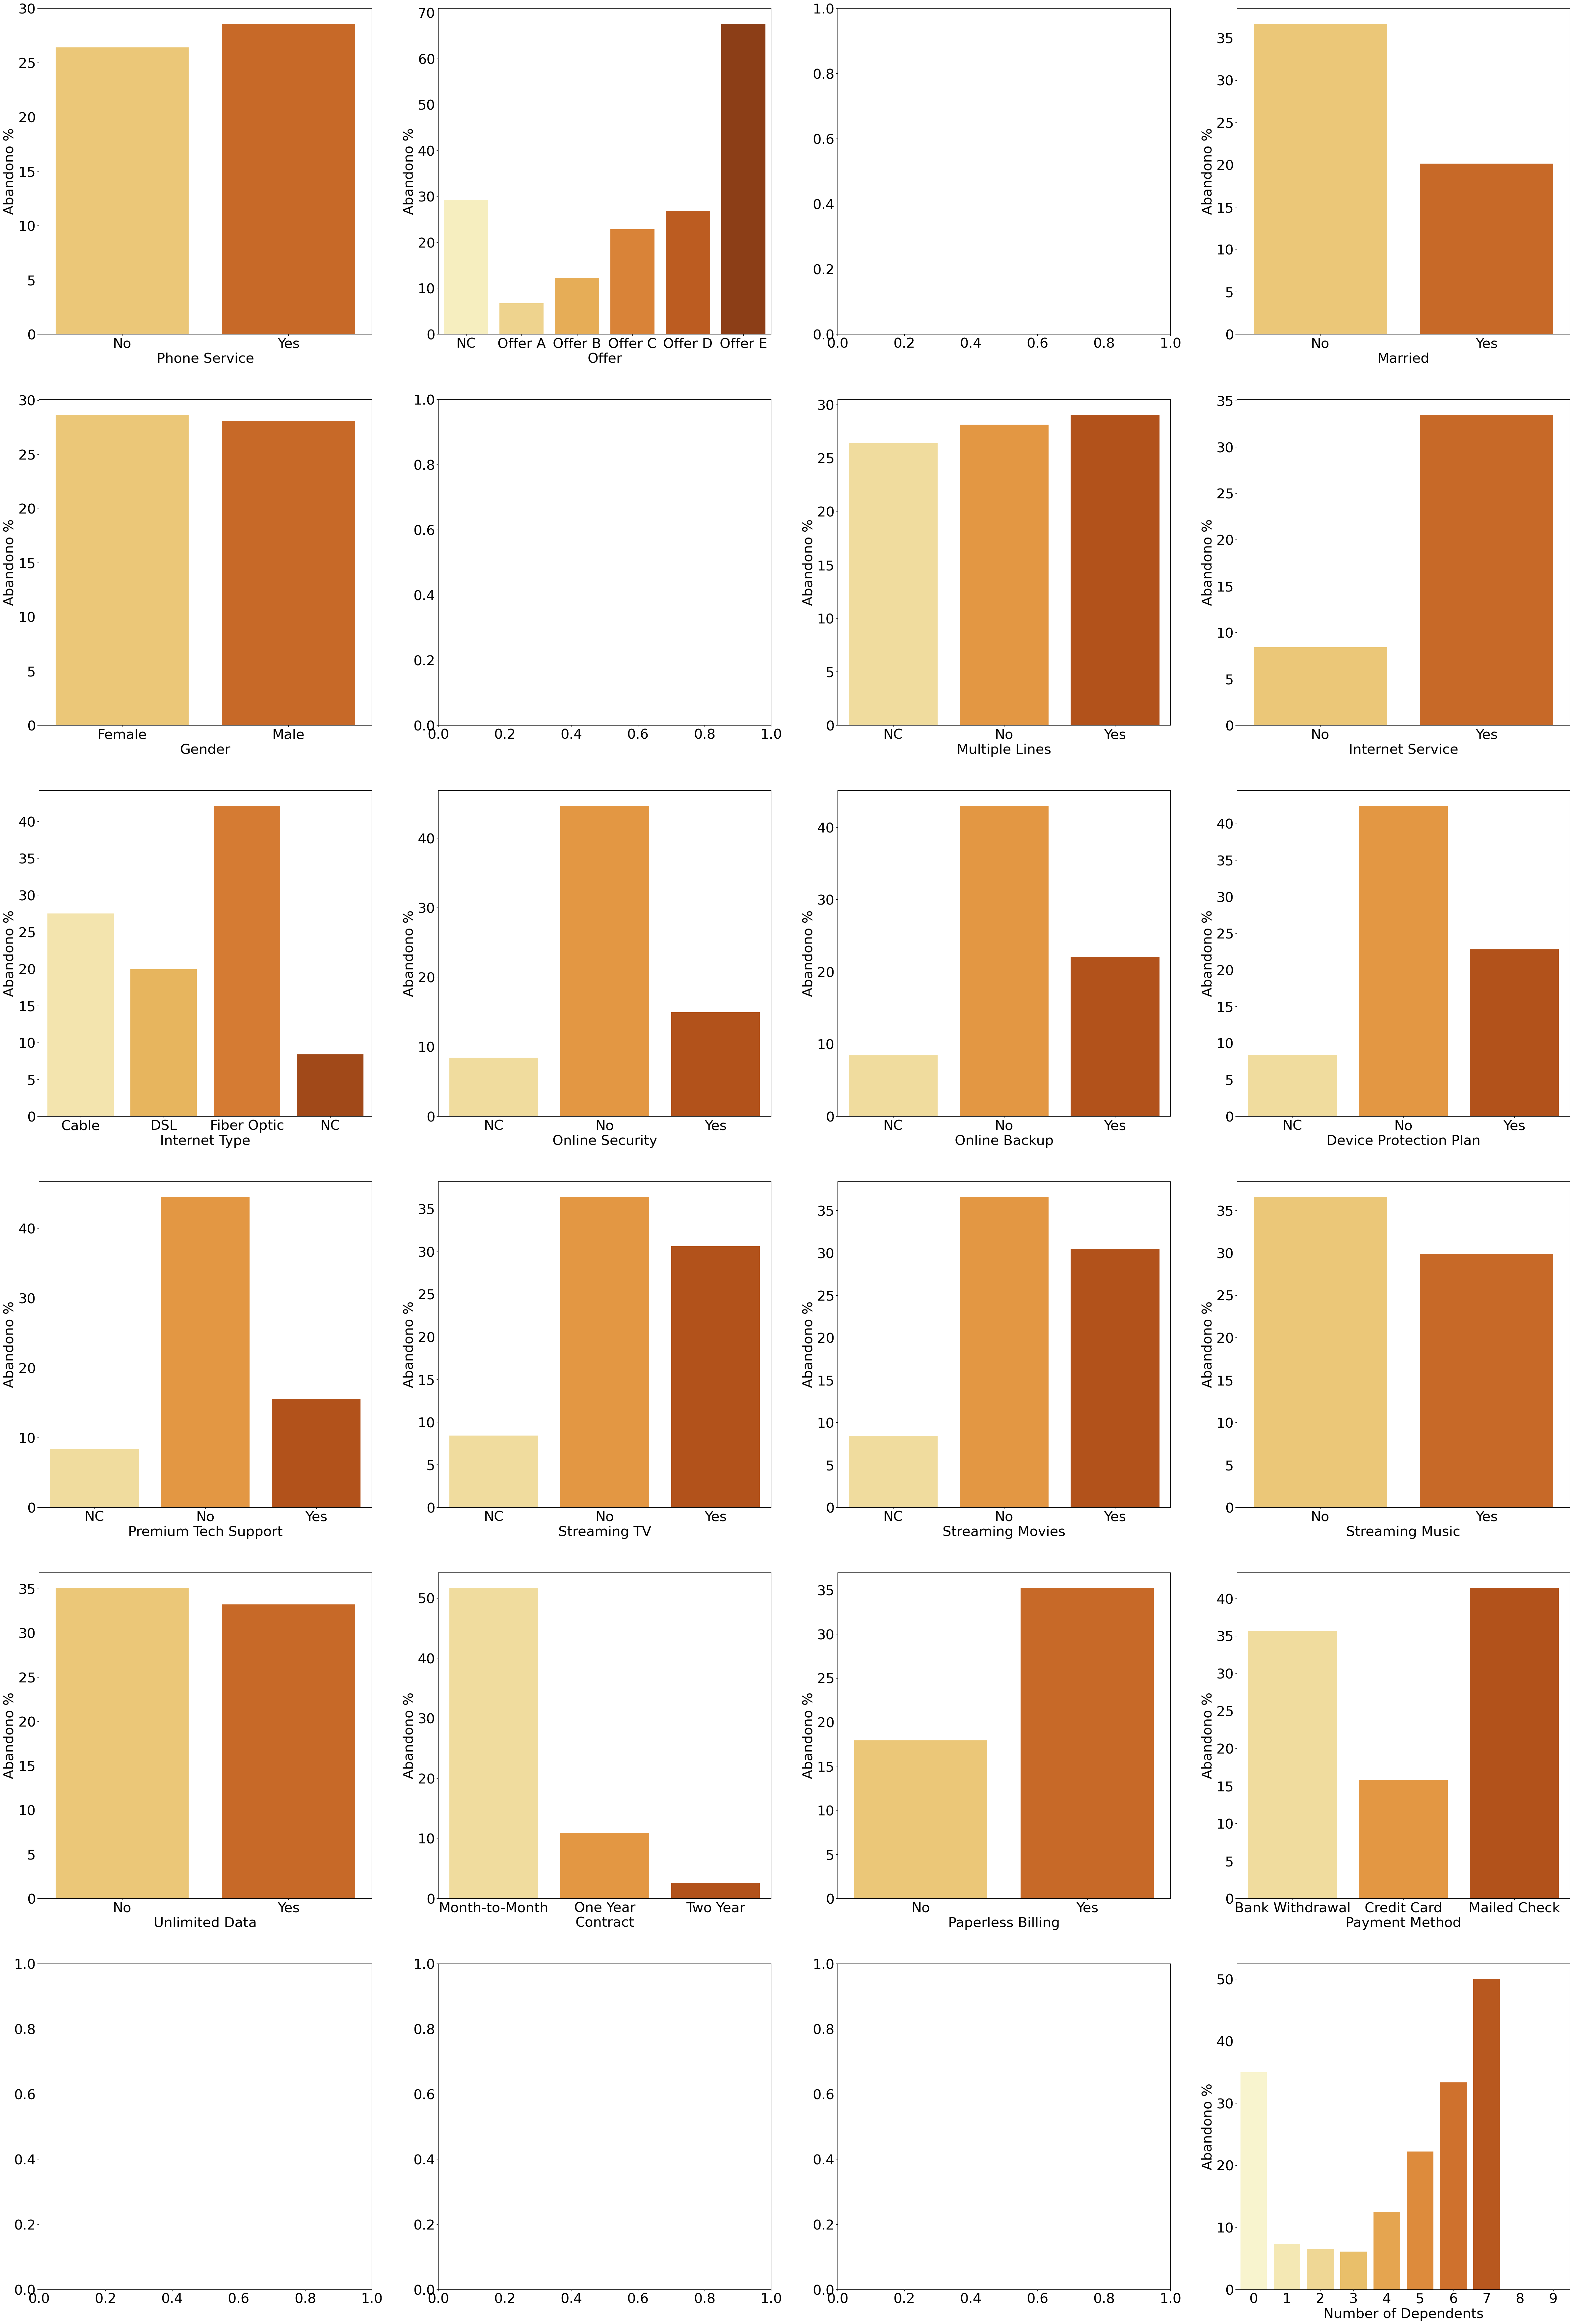

In [56]:
matplotlib.rc('axes', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
matplotlib.rc('xtick', labelsize=30) 
f, axs = plt.subplots(6, 4, figsize=(60, 90), gridspec_kw=dict(width_ratios=[5, 5, 5, 5]))

bp0 = sns.barplot(data=lista_df_churned_division[5], x=lista_df_churned_division[5].index, y="Abandono %", palette="YlOrBr", ax=axs[0, 0])
bp1 = sns.barplot(data=lista_df_churned_division[4], x=lista_df_churned_division[4].index, y="Abandono %", palette="YlOrBr", ax=axs[0, 1])
#bp2 = sns.barplot(data=lista_df_churned_division[3], x=lista_df_churned_division[3].index, y="Abandono %", palette="YlOrBr", ax=axs[0, 2])
bp3 = sns.barplot(data=lista_df_churned_division[2], x=lista_df_churned_division[2].index, y="Abandono %", palette="YlOrBr", ax=axs[0, 3])
bp4 = sns.barplot(data=lista_df_churned_division[1], x=lista_df_churned_division[1].index, y="Abandono %", palette="YlOrBr", ax=axs[1, 0])
#bp5 = sns.barplot(data=lista_df_churned_division[0], x=lista_df_churned_division[0].index, y="Abandono %", palette="YlOrBr", ax=axs[1, 1])
bp6 = sns.barplot(data=lista_df_churned_division[6], x=lista_df_churned_division[6].index, y="Abandono %", palette="YlOrBr", ax=axs[1, 2])
bp7 = sns.barplot(data=lista_df_churned_division[7], x=lista_df_churned_division[7].index, y="Abandono %", palette="YlOrBr", ax=axs[1, 3])
bp8 = sns.barplot(data=lista_df_churned_division[8], x=lista_df_churned_division[8].index, y="Abandono %", palette="YlOrBr", ax=axs[2, 0])
bp9 = sns.barplot(data=lista_df_churned_division[9], x=lista_df_churned_division[9].index, y="Abandono %", palette="YlOrBr", ax=axs[2, 1])
bp10 = sns.barplot(data=lista_df_churned_division[10], x=lista_df_churned_division[10].index, y="Abandono %", palette="YlOrBr", ax=axs[2, 2])
bp11 = sns.barplot(data=lista_df_churned_division[11], x=lista_df_churned_division[11].index, y="Abandono %", palette="YlOrBr", ax=axs[2, 3])
bp12 = sns.barplot(data=lista_df_churned_division[12], x=lista_df_churned_division[12].index, y="Abandono %", palette="YlOrBr", ax=axs[3, 0])
bp13 = sns.barplot(data=lista_df_churned_division[13], x=lista_df_churned_division[13].index, y="Abandono %", palette="YlOrBr", ax=axs[3, 1])
bp14 = sns.barplot(data=lista_df_churned_division[14], x=lista_df_churned_division[14].index, y="Abandono %", palette="YlOrBr", ax=axs[3, 2])
bp15 = sns.barplot(data=lista_df_churned_division[15], x=lista_df_churned_division[15].index, y="Abandono %", palette="YlOrBr", ax=axs[3, 3])
bp16 = sns.barplot(data=lista_df_churned_division[16], x=lista_df_churned_division[16].index, y="Abandono %", palette="YlOrBr", ax=axs[4, 0])
bp17 = sns.barplot(data=lista_df_churned_division[17], x=lista_df_churned_division[17].index, y="Abandono %", palette="YlOrBr", ax=axs[4, 1])
bp18 = sns.barplot(data=lista_df_churned_division[18], x=lista_df_churned_division[18].index, y="Abandono %", palette="YlOrBr", ax=axs[4, 2])
bp19 = sns.barplot(data=lista_df_churned_division[19], x=lista_df_churned_division[19].index, y="Abandono %", palette="YlOrBr", ax=axs[4, 3])
#bp20 = sns.barplot(data=lista_df_churned_division[20], x=lista_df_churned_division[20].index, y="Abandono %", palette="YlOrBr", ax=axs[5, 0])
#bp21 = sns.barplot(data=lista_df_churned_division[21], x=lista_df_churned_division[21].index, y="Abandono %", palette="YlOrBr", ax=axs[5, 1])
#bp22 = sns.barplot(data=lista_df_churned_division[22], x=lista_df_churned_division[22].index, y="Abandono %", palette="YlOrBr", ax=axs[5, 2])
bp23 = sns.barplot(data=lista_df_churned_division[23], x=lista_df_churned_division[23].index, y="Abandono %", palette="YlOrBr", ax=axs[5, 3])


#Creo gráficos de barra para cada variable categórica. Eliminamos los gráficos de las variables "City", "Customer ID", "Churn Reason", "Customer Status" y "Churn Category" porque no corresponde un gráfico de barras en estos casos.

In [57]:
#Variables que no parecen influir en el comportamiento de abandono: "Gender", "Phone Service", "Streaming Movies", "Streaming TV", "Streaming Music", "Unlimited Data"
#VAriables que SI parecen influir en el comportamiento de abandono: "Married", "Internet Service", "Number of Dependents", "Internet Type", "Online Security", "Online Backup", "Device Protection Plan", "Premium Tech Support", "Contract", "Paperless Billing", "Payment Method", "Number of Dependents"
#Creo una lista con las variables categoricas a incluir en el modelo
variables_incluidas = ["Customer Status", "Married", "Internet Service", "Number of Dependents", "Internet Type", "Online Security", "Online Backup", "Device Protection Plan", "Premium Tech Support", "Contract", "Paperless Billing", "Payment Method", "Number of Dependents"]

In [58]:
len(variables_incluidas)


13

c:\Users\agus_\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\agus_\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\agus_\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\agus_\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.

<Axes: xlabel='Total Extra Data Charges', ylabel='Density'>

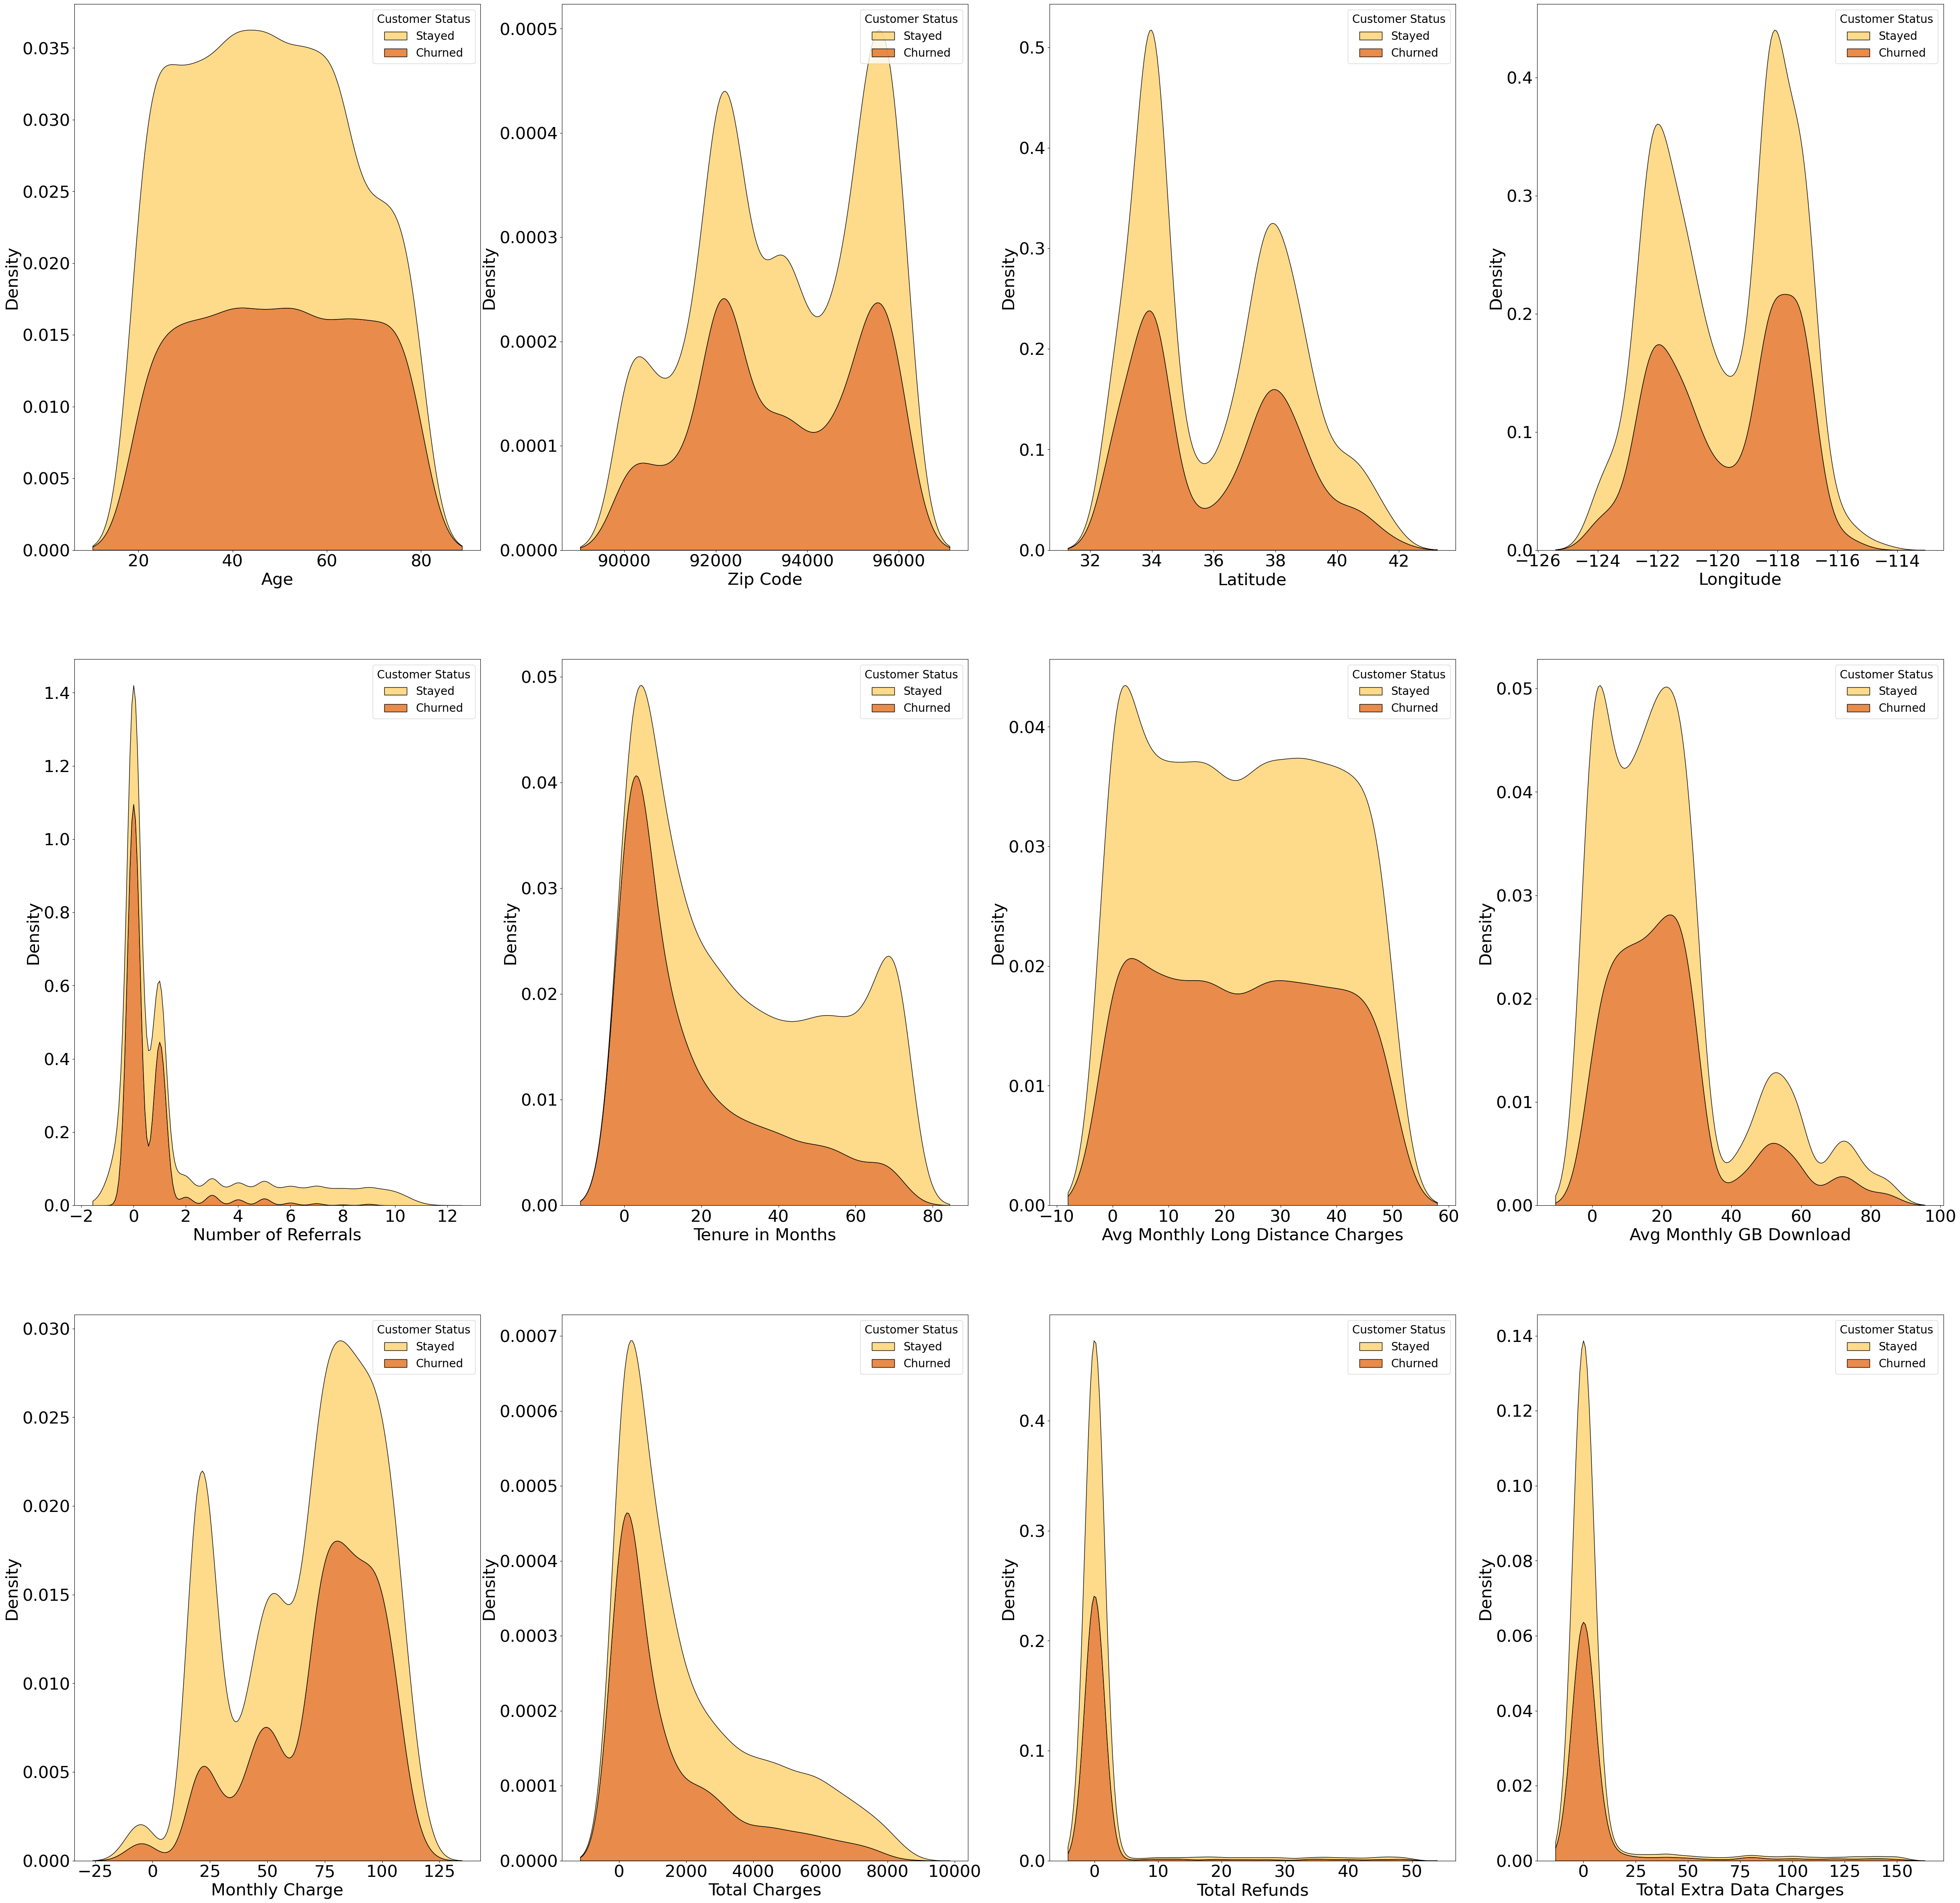

In [59]:
matplotlib.rc('axes', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
matplotlib.rc('xtick', labelsize=30) 
f, axs = plt.subplots(3, 4, figsize=(60, 60), gridspec_kw=dict(width_ratios=[5, 5, 5, 5]))
sns.kdeplot(data=df, x=lista_variables_numericas[0], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[0, 0])
sns.kdeplot(data=df, x=lista_variables_numericas[1], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[0, 1])
sns.kdeplot(data=df, x=lista_variables_numericas[2], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[0, 2])
sns.kdeplot(data=df, x=lista_variables_numericas[3], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[0, 3])
sns.kdeplot(data=df, x=lista_variables_numericas[4], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[1, 0])
sns.kdeplot(data=df, x=lista_variables_numericas[5], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[1, 1])
sns.kdeplot(data=df, x=lista_variables_numericas[6], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[1, 2])
sns.kdeplot(data=df, x=lista_variables_numericas[7], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[1, 3])
sns.kdeplot(data=df, x=lista_variables_numericas[8], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[2, 0])
sns.kdeplot(data=df, x=lista_variables_numericas[9], hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[2, 1])
sns.kdeplot(data=df, x=lista_variables_numericas[10],hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[2, 2])
sns.kdeplot(data=df, x=lista_variables_numericas[11],hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[2, 3])
#sns.kdeplot(data=df, x=lista_variables_numericas[12],hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[3, 0])
#sns.kdeplot(data=df, x=lista_variables_numericas[13],hue="Customer Status", multiple= "stack", palette="YlOrBr", common_norm = False, ax=axs[3, 1])

In [60]:
#Variables que no parecen influir en el comportamiento de abandono: "Zip Code", "Latitude", "Longitud", "Avg Monthly GB Download", "Total Charges", "Total Refunds", "Total Extra Data Charges", "Total Long Distance Charges", "Total Revenue" 
#Variables que SI parecen influir en el comportamiento de abandono: "Age", "Tenure in Months", "Monthly Charge", "Number of Referrals"
#Incluyo estas variables a la lista anterior
variables_incluidas += ["Age", "Tenure in Months", "Monthly Charge", "Number of Referrals"]
print(variables_incluidas)

['Customer Status', 'Married', 'Internet Service', 'Number of Dependents', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Contract', 'Paperless Billing', 'Payment Method', 'Number of Dependents', 'Age', 'Tenure in Months', 'Monthly Charge', 'Number of Referrals']


In [61]:
#Bucle para calcular el % de abandono en funcion de las distintas variables numericas 
df_churned2 = df[df["Customer Status"]=="Churned"]
lista_df_churned_division2 = []
for i in lista_variables_numericas:
        df_churned_agrupado2 = df_churned2.groupby(i)["Customer ID"].count()
        df_t2 = df.groupby(i)["Customer ID"].count()
        df_churned_division2 = (df_churned_agrupado2 / df_t2)*100
        df_churned_division2 = df_churned_division2.to_frame()
        df_churned_division2 = df_churned_division2.rename(columns={"Customer ID":"Abandono %"}).reset_index()
        lista_df_churned_division2.append(df_churned_division2)


C:\Users\agus_\AppData\Local\Temp\ipykernel_24404\2169596290.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=lista_df_churned_division2[0], x=lista_variables_numericas[0], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[0, 0])
C:\Users\agus_\AppData\Local\Temp\ipykernel_24404\2169596290.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=lista_df_churned_division2[1], x=lista_variables_numericas[1], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[0, 1])
C:\Users\agus_\AppData\Local\Temp\ipykernel_24404\2169596290.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=lista_df_churned_division2[2], x=lista_variables_numericas[2], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[0, 2])
C:\Users\agus_\AppData\Local\Temp\ipykernel_24404\2169596290.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned

<Axes: xlabel='Total Extra Data Charges', ylabel='Abandono %'>

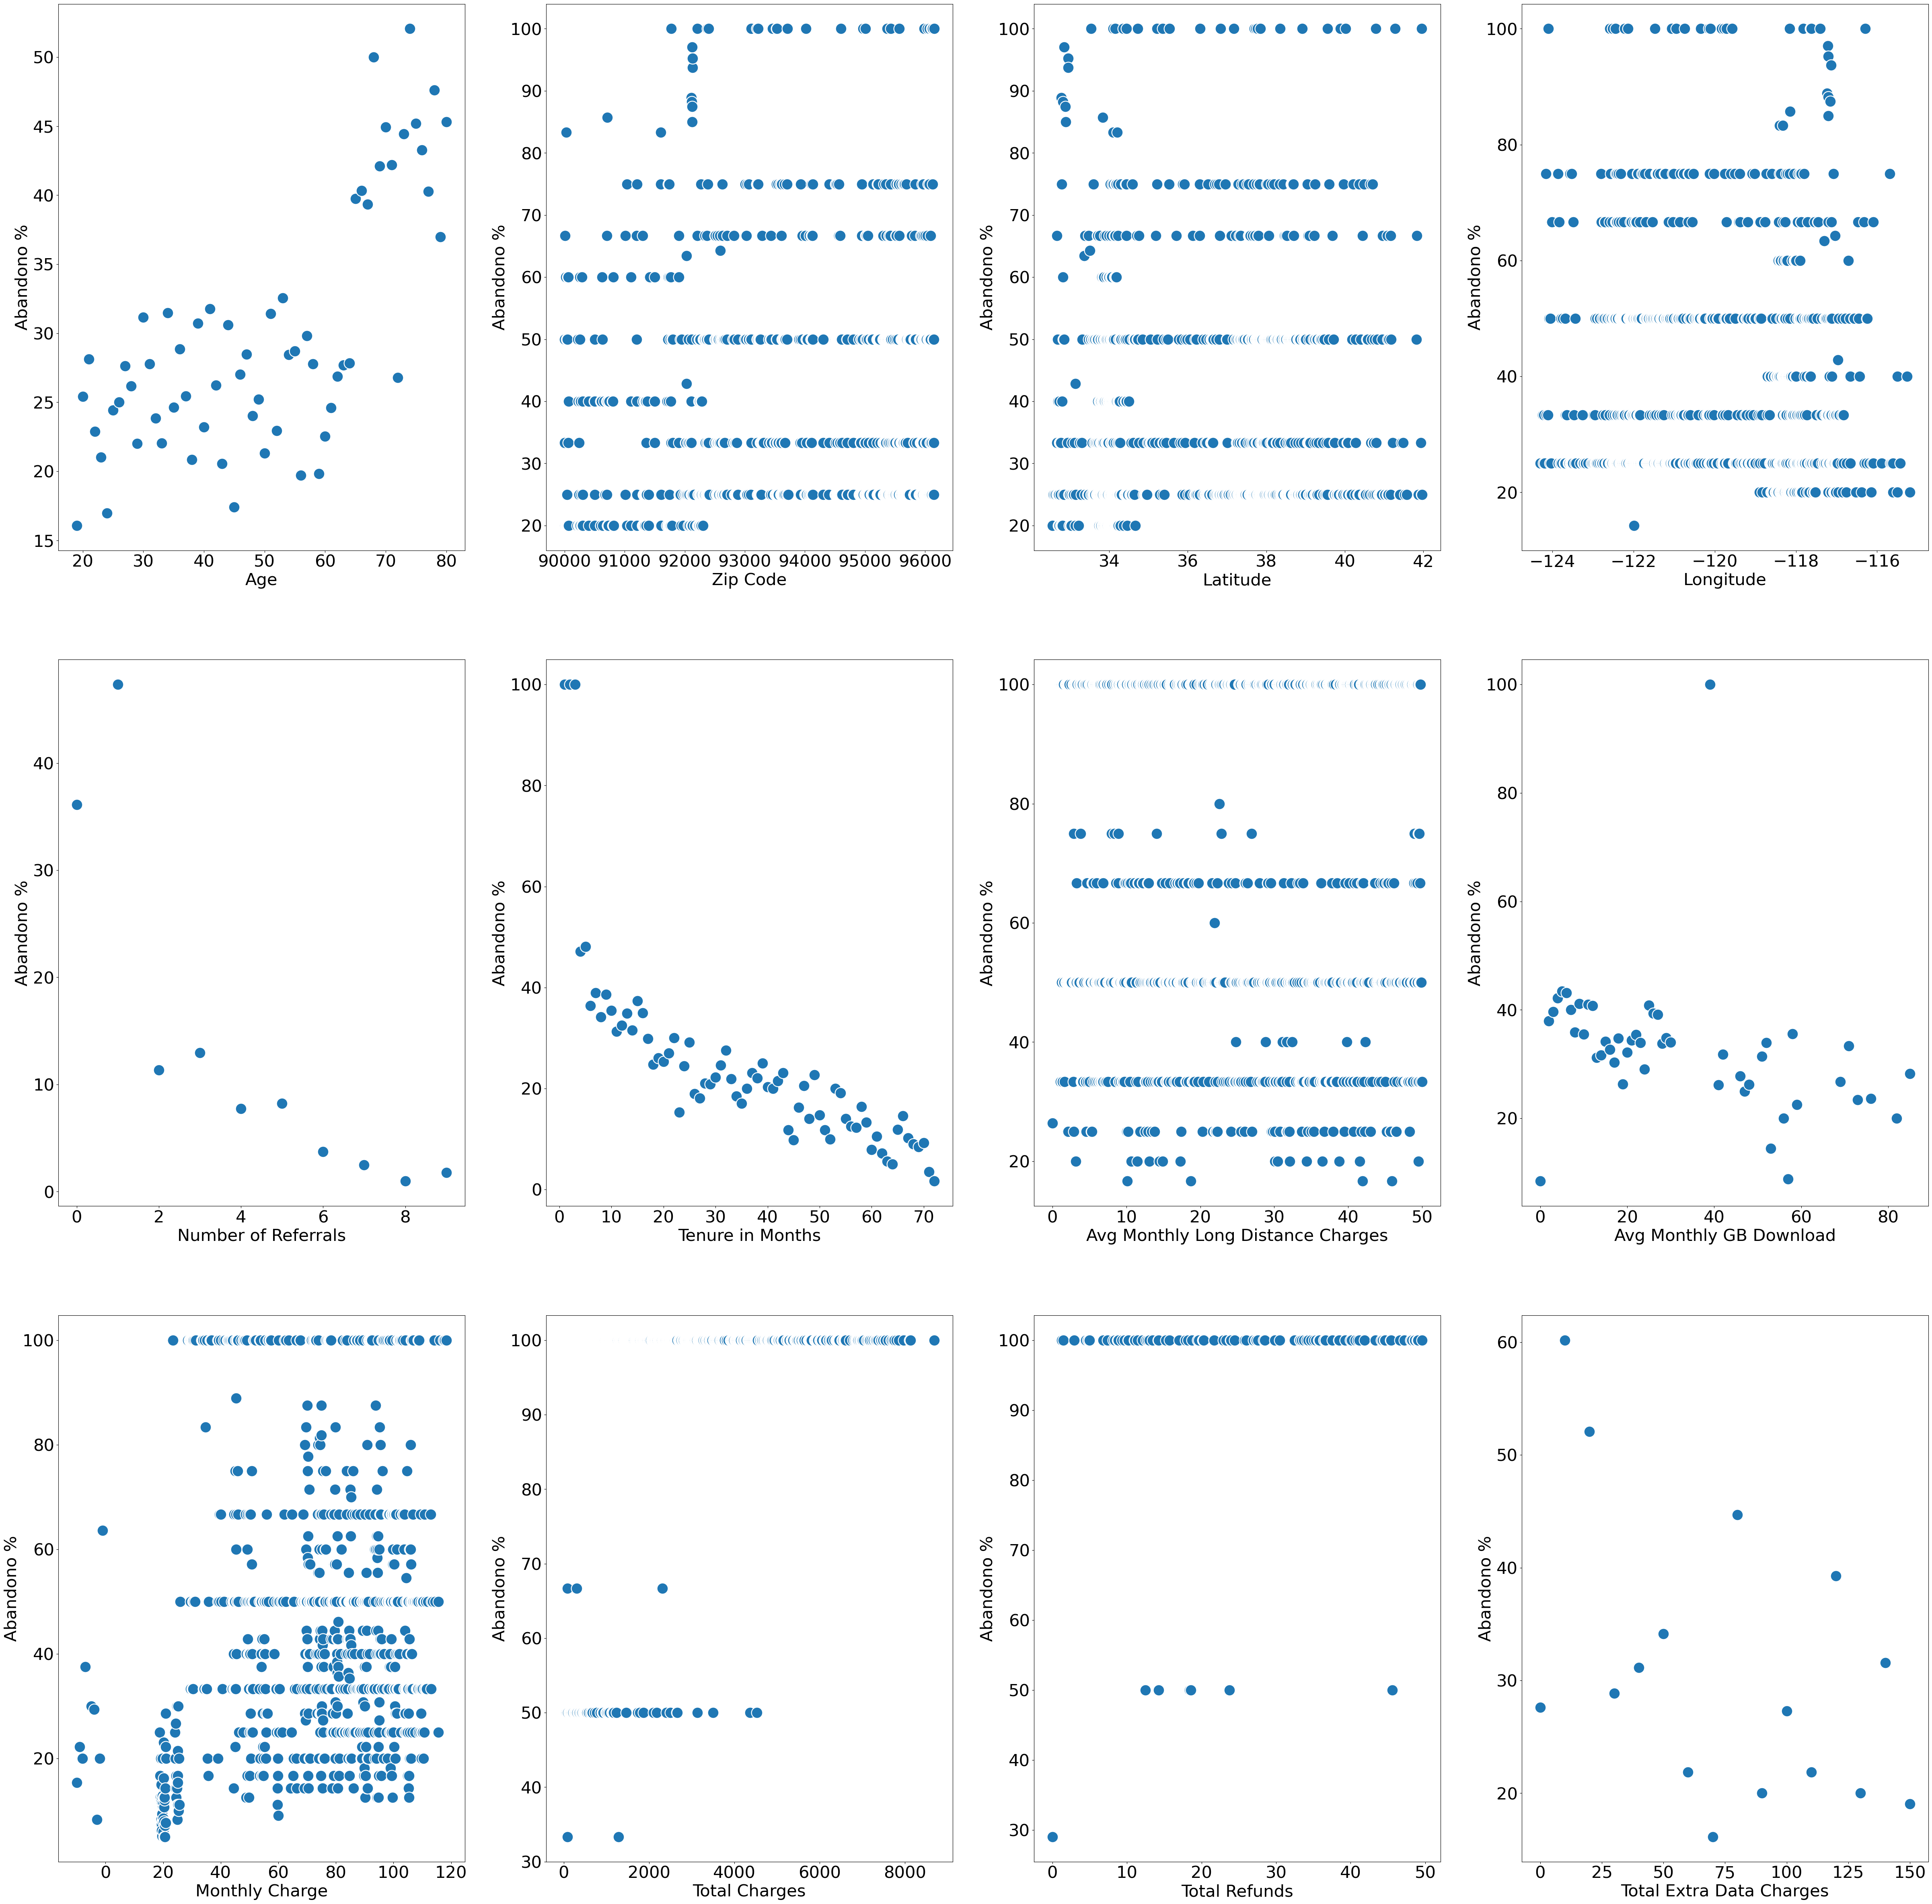

In [62]:
#Graficos de tipo scatter plot para evaluar el porcentaje de abandono en funcion de las distintas variables numericas
f, axs = plt.subplots(3, 4, figsize=(60, 60), gridspec_kw=dict(width_ratios=[5, 5, 5, 5]))
sns.scatterplot(data=lista_df_churned_division2[0], x=lista_variables_numericas[0], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[0, 0])
sns.scatterplot(data=lista_df_churned_division2[1], x=lista_variables_numericas[1], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[0, 1])
sns.scatterplot(data=lista_df_churned_division2[2], x=lista_variables_numericas[2], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[0, 2])
sns.scatterplot(data=lista_df_churned_division2[3], x=lista_variables_numericas[3], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[0, 3])
sns.scatterplot(data=lista_df_churned_division2[4], x=lista_variables_numericas[4], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[1, 0])
sns.scatterplot(data=lista_df_churned_division2[5], x=lista_variables_numericas[5], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[1, 1])
sns.scatterplot(data=lista_df_churned_division2[6], x=lista_variables_numericas[6], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[1, 2])
sns.scatterplot(data=lista_df_churned_division2[7], x=lista_variables_numericas[7], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[1, 3])
sns.scatterplot(data=lista_df_churned_division2[8], x=lista_variables_numericas[8], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[2, 0])
sns.scatterplot(data=lista_df_churned_division2[9], x=lista_variables_numericas[9], y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[2, 1])
sns.scatterplot(data=lista_df_churned_division2[10],x=lista_variables_numericas[10],y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[2, 2])
sns.scatterplot(data=lista_df_churned_division2[11],x=lista_variables_numericas[11],y="Abandono %",  palette="YlOrBr",s=400,  ax=axs[2, 3])
#sns.scatterplot(data=lista_df_churned_division2[12],x=lista_variables_numericas[12],y="Abandono %",  palette="YlOrBr",  ax=axs[3, 0])
#sns.scatterplot(data=lista_df_churned_division2[13],x=lista_variables_numericas[13],y="Abandono %",  palette="YlOrBr",  ax=axs[3, 1])

In [63]:
# Se confirman los hallazgos encontrados con los histogramas. Además se observa una ligera relación indirectamente proporcional entre el % de abandono y la variable "Avg Monthly GB Dwnload". Se decide explorar con mayor profundidad esta variable a continuación.

<Axes: xlabel='Streaming Music', ylabel='Avg Monthly GB Download'>

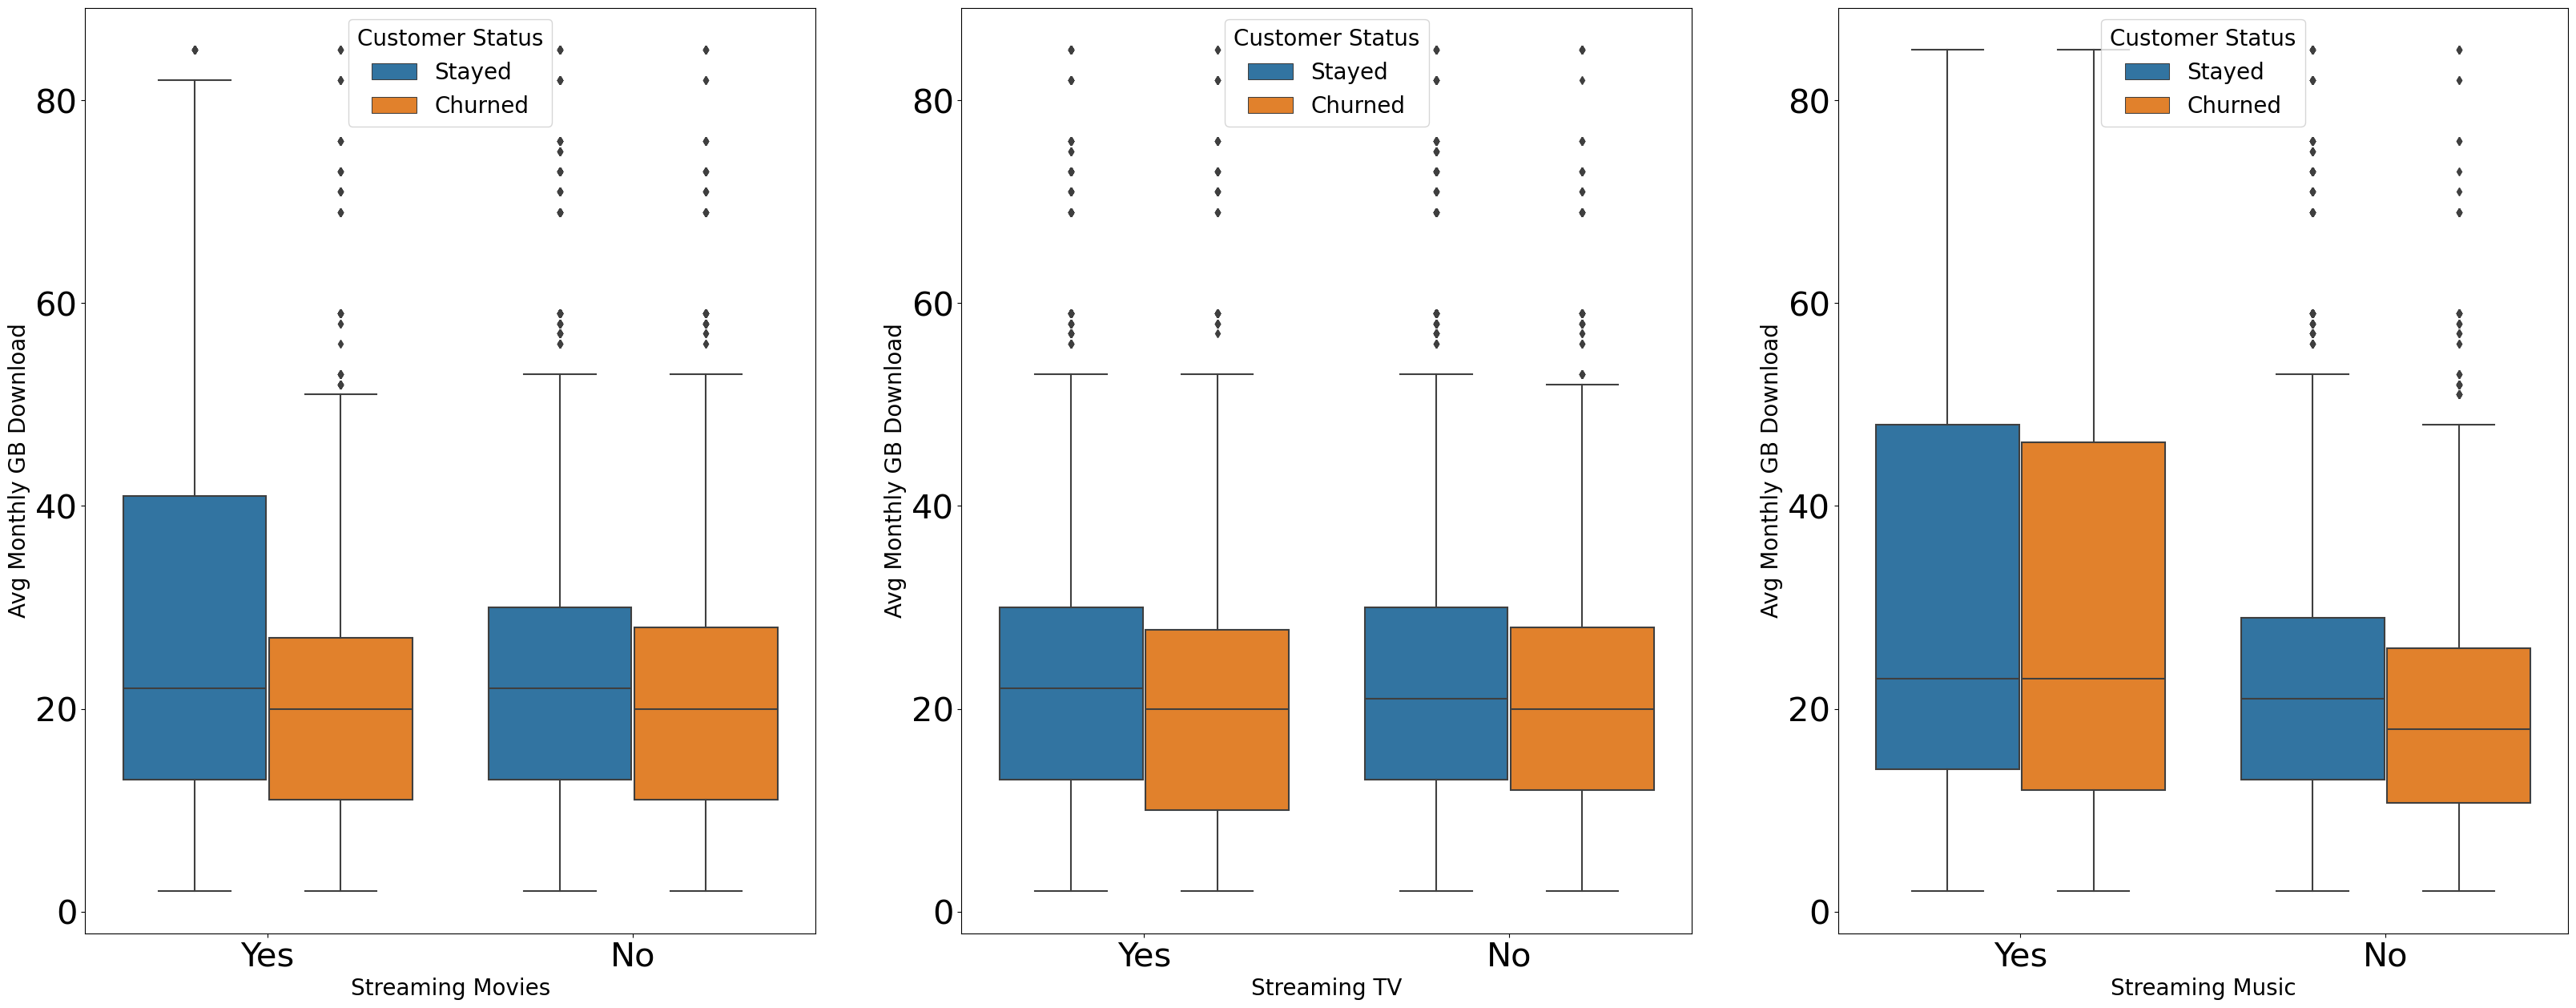

In [64]:

f, axs = plt.subplots(1, 3, figsize=(40, 15), gridspec_kw=dict(width_ratios=[5, 5, 5]))

axs[0].set_xlabel("xlabel", fontsize=20)
axs[1].set_xlabel("xlabel", fontsize=20)
axs[2].set_xlabel("xlabel", fontsize=20)
axs[0].set_ylabel("ylabel", fontsize=20)
axs[1].set_ylabel("ylabel", fontsize=20)
axs[2].set_ylabel("ylabel", fontsize=20)
sns.boxplot(data=df, x="Streaming Movies", y="Avg Monthly GB Download", hue="Customer Status", ax=axs[0], order=["Yes", "No"])
sns.boxplot(data=df, x="Streaming TV",     y="Avg Monthly GB Download", hue="Customer Status", ax=axs[1], order=["Yes", "No"])
sns.boxplot(data=df, x="Streaming Music",  y="Avg Monthly GB Download", hue="Customer Status", ax=axs[2], order=["Yes", "No"])

In [65]:
#No se observan diferencias en el consumo de Películas, TV o Música entre los clientes que abandonana y los que no.

In [66]:
#Bucle para calcular el % de abandono para aquellos clientes que consumen Películas, TV o Múscia
df_churned3 = df[(df["Customer Status"]=="Churned") & (df["Streaming Movies"]=="Yes")]
df_Movies = df[df["Streaming Movies"]=="Yes"]
lista_df_churned_division3 = []
for i in lista_variables_numericas:
        df_churned_agrupado3 = df_churned3.groupby(i)["Customer ID"].count()
        df_t3 = df_Movies.groupby(i)["Customer ID"].count()
        df_churned_division3 = (df_churned_agrupado3 / df_t3)*100
        df_churned_division3 = df_churned_division3.to_frame()
        df_churned_division3 = df_churned_division3.rename(columns={"Customer ID":"Abandono %"}).reset_index()
        lista_df_churned_division3.append(df_churned_division3)

df_churned4 = df[(df["Customer Status"]=="Churned") & (df["Streaming TV"]=="Yes")]
df_TV = df[df["Streaming TV"]=="Yes"]
lista_df_churned_division4 = []
for i in lista_variables_numericas:
        df_churned_agrupado4 = df_churned4.groupby(i)["Customer ID"].count()
        df_t4 = df_Movies.groupby(i)["Customer ID"].count()
        df_churned_division4 = (df_churned_agrupado4 / df_t4)*100
        df_churned_division4 = df_churned_division4.to_frame()
        df_churned_division4 = df_churned_division4.rename(columns={"Customer ID":"Abandono %"}).reset_index()
        lista_df_churned_division4.append(df_churned_division4)

df_churned5 = df[(df["Customer Status"]=="Churned") & (df["Streaming Music"]=="Yes")]
df_TV = df[df["Streaming Music"]=="Yes"]
lista_df_churned_division5 = []
for i in lista_variables_numericas:
        df_churned_agrupado5 = df_churned5.groupby(i)["Customer ID"].count()
        df_t5 = df_Movies.groupby(i)["Customer ID"].count()
        df_churned_division5 = (df_churned_agrupado5 / df_t5)*100
        df_churned_division5 = df_churned_division5.to_frame()
        df_churned_division5 = df_churned_division5.rename(columns={"Customer ID":"Abandono %"}).reset_index()
        lista_df_churned_division5.append(df_churned_division5)

C:\Users\agus_\AppData\Local\Temp\ipykernel_24404\1498005625.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=lista_df_churned_division3[7], x=lista_variables_numericas[7],y="Abandono %",  palette="YlOrBr", s=400, ax=axs[0])
C:\Users\agus_\AppData\Local\Temp\ipykernel_24404\1498005625.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=lista_df_churned_division4[7], x=lista_variables_numericas[7], y="Abandono %",  palette="YlOrBr", s=400, ax=axs[1])
C:\Users\agus_\AppData\Local\Temp\ipykernel_24404\1498005625.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=lista_df_churned_division5[7], x=lista_variables_numericas[7], y="Abandono %",  palette="YlOrBr", s=400, ax=axs[2])


<Axes: xlabel='Avg Monthly GB Download', ylabel='Abandono %'>

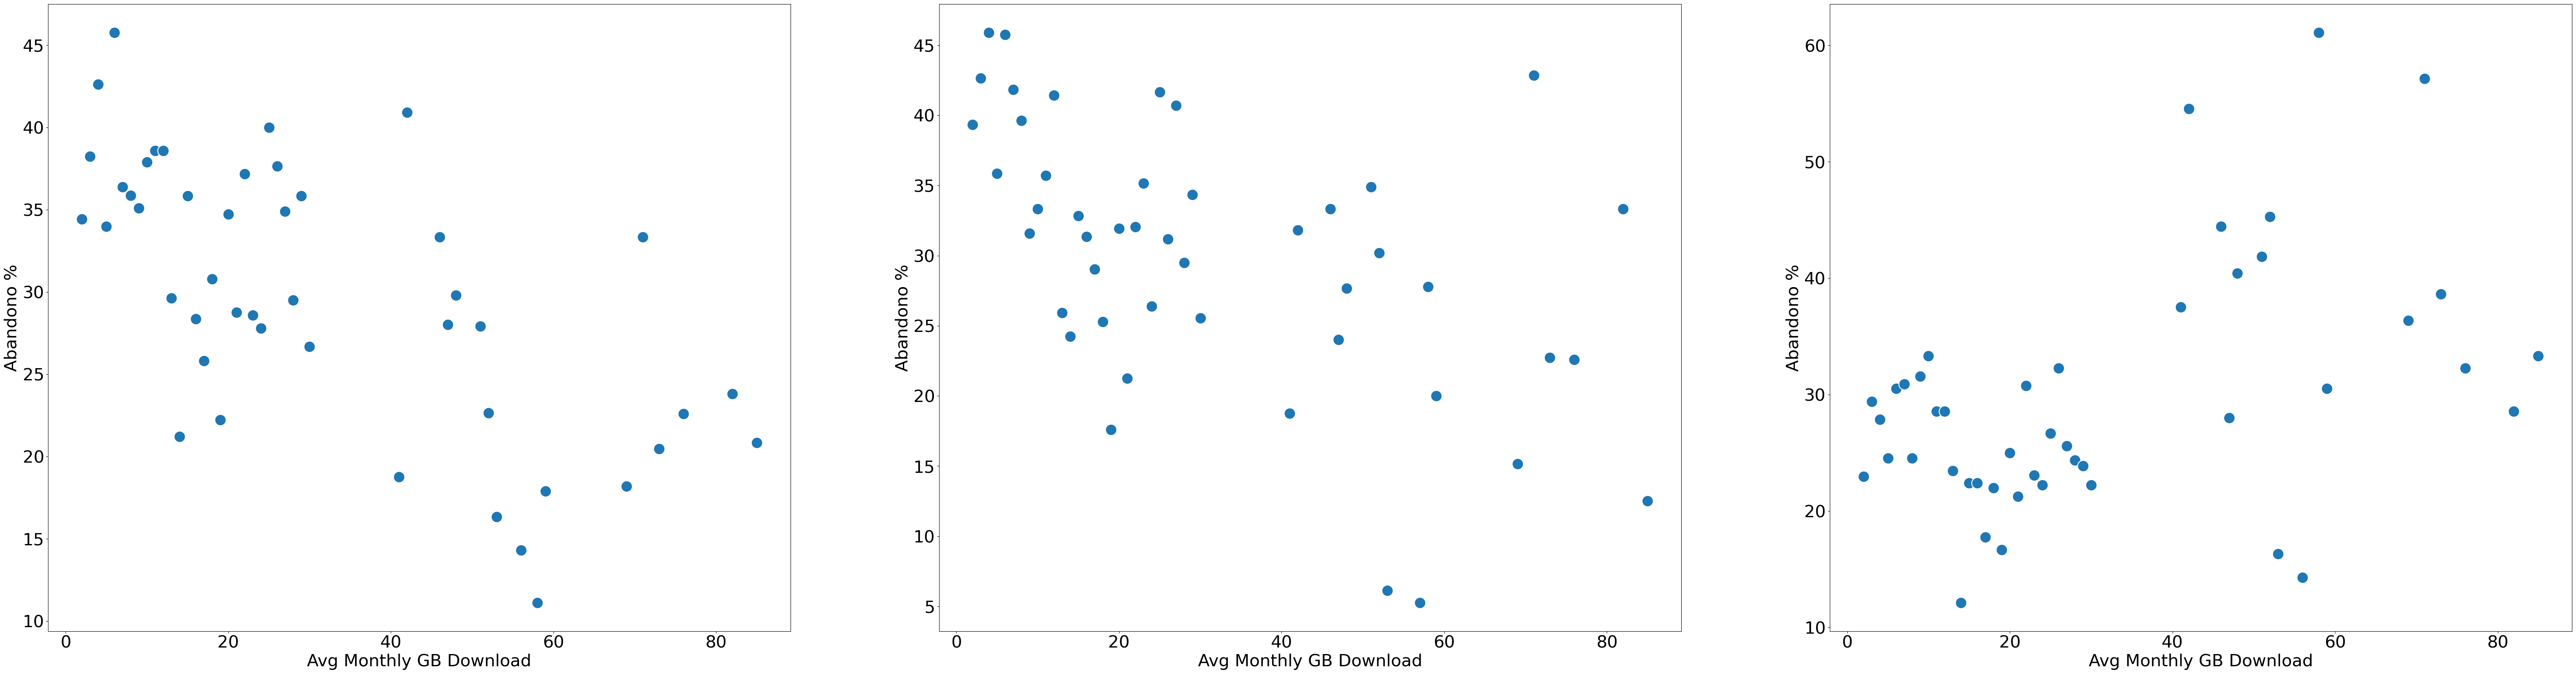

In [67]:
#Graficamos el % de abandono en función de la cantidad de GB consumidos de Películas, TV o Música.
f, axs = plt.subplots(1, 3, figsize=(80, 20), gridspec_kw=dict(width_ratios=[5, 5, 5]))
sns.scatterplot(data=lista_df_churned_division3[7], x=lista_variables_numericas[7],y="Abandono %",  palette="YlOrBr", s=400, ax=axs[0])
sns.scatterplot(data=lista_df_churned_division4[7], x=lista_variables_numericas[7], y="Abandono %",  palette="YlOrBr", s=400, ax=axs[1])
sns.scatterplot(data=lista_df_churned_division5[7], x=lista_variables_numericas[7], y="Abandono %",  palette="YlOrBr", s=400, ax=axs[2])

In [68]:
#Observamos que para el caso de clientes que consumen TV o Películas, existe una relación indirectamente proporcional entre el consumo y el % de abandono. Para el caso del consumo de Música no se observa esta relación.
#Incorporamos las variables "Avg Monthly GB Download", "Streaming Movies", "Streaming TV" 
variables_incluidas += ["Avg Monthly GB Download", "Streaming Movies", "Streaming TV"]
print(variables_incluidas)
len(variables_incluidas)

['Customer Status', 'Married', 'Internet Service', 'Number of Dependents', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Contract', 'Paperless Billing', 'Payment Method', 'Number of Dependents', 'Age', 'Tenure in Months', 'Monthly Charge', 'Number of Referrals', 'Avg Monthly GB Download', 'Streaming Movies', 'Streaming TV']


20

# Identificación de outliers

In [69]:
# Funcion iqr para la deteccion de outliers.
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_

In [70]:
# Creo un diccionario que contiene como clave lel nombre de la variable numérica y como valor una serie en la que los registros con valor 1 corresponden a outliers.

df.reset_index(drop=True, inplace=True)
dic_outliers = {}
for i in lista_variables_numericas:
    outliers = iqr_outlier(df[i], 1.5)
    dic_outliers.update({str(i):outliers})



In [71]:
# Creo un diccionario que contiene los indices de aquellos registros que continenen outliers.
dic_indices_outliers = {}
for i in lista_variables_numericas:
    out = dic_outliers[i]
    out = out.index[out==1].tolist()
    dic_indices_outliers.update({str(i):out})


In [72]:
#Cuantifico cuantos outliers hay por variable
for key in dic_indices_outliers:
    print(f'{key}:  {len(dic_indices_outliers[key])}')
 

Age:  0
Zip Code:  0
Latitude:  0
Longitude:  0
Number of Referrals:  649
Tenure in Months:  0
Avg Monthly Long Distance Charges:  0
Avg Monthly GB Download:  342
Monthly Charge:  0
Total Charges:  0
Total Refunds:  520
Total Extra Data Charges:  684
Total Long Distance Charges:  136
Total Revenue:  9


In [30]:
outliers_comun = list(set(dic_indices_outliers["Number of Referrals"]).intersection(dic_indices_outliers["Avg Monthly GB Download"]))
outliers_distintos = set(dic_indices_outliers["Number of Referrals"]).symmetric_difference(set(dic_indices_outliers["Avg Monthly GB Download"]))
outliers_eliminar = list(outliers_comun) + list(outliers_distintos)

In [31]:
df.drop(index=outliers_eliminar, inplace = True)

In [32]:
len(df)

5636

# Feature Engeneering

In [33]:
#Transformamos las variables categoricas en variables numericas mediante Label Encoding
df_pre_modelo = df[variables_incluidas]

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
lista_encoding = ['Customer Status', 'Married', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Contract', 'Paperless Billing', 'Payment Method', 'Streaming Movies', 'Streaming TV']
lista_codigos = []
for i in lista_encoding:
    df_pre_modelo[i] = encoder.fit_transform(df_pre_modelo[i])
    codigo = dict(zip(encoder.classes_,range(len(encoder.classes_))))
    lista_codigos.append(codigo)
# La codificacion de cada variable quedo almacenada en lista_codigos

C:\Users\agus_\AppData\Local\Temp\ipykernel_34396\932528768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_modelo[i] = encoder.fit_transform(df_pre_modelo[i])
C:\Users\agus_\AppData\Local\Temp\ipykernel_34396\932528768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_modelo[i] = encoder.fit_transform(df_pre_modelo[i])
C:\Users\agus_\AppData\Local\Temp\ipykernel_34396\932528768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [34]:
lista_codigos[10]

{'Bank Withdrawal': 0, 'Credit Card': 1, 'Mailed Check': 2}

# Feature Extraction / Feature Selection

In [35]:
# Preparamos el set de datos para aplicar el metodo del chi cuadrado.
array = df_pre_modelo
array.drop(array[array["Monthly Charge"]<0].index, inplace=True) 
array = df_pre_modelo.values
X = array[:, 1:20]
Y = array[:,0]
print(array)

[[ 1.  1.  1. ... 16.  1.  2.]
 [ 0.  0.  1. ... 30.  1.  1.]
 [ 0.  1.  1. ...  4.  2.  2.]
 ...
 [ 0.  1.  1. ... 17.  2.  1.]
 [ 1.  1.  1. ... 58.  2.  1.]
 [ 1.  1.  1. ...  5.  2.  2.]]


C:\Users\agus_\AppData\Local\Temp\ipykernel_34396\2510434172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array.drop(array[array["Monthly Charge"]<0].index, inplace=True)


In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [37]:
# Feature extraction mediante el método de chi cuadrado
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
scores = fit.scores_
pvalues = fit.pvalues_
columnas = df_pre_modelo.columns.to_frame().reset_index(drop=True)
columnas = columnas.iloc[1:].reset_index(drop=True)
scores = pd.DataFrame(scores)
pvalues = pd.DataFrame(pvalues)
feature_selection = pd.concat([columnas, scores, pvalues], axis=1)
feature_selection.columns.values[0] = 0
feature_selection.columns.values[1] = 1
feature_selection.columns.values[2] = 2
features = fit.transform(X)

# Observamos que las variables Online Security y Premium Tech Support son independientes de la variable de respuesta, de modo que las eliminamos del modelo.


In [38]:
df_pre_modelo.drop(columns=["Online Security", "Premium Tech Support", "Customer Status"], inplace=True)

C:\Users\agus_\AppData\Local\Temp\ipykernel_34396\3753368437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_modelo.drop(columns=["Online Security", "Premium Tech Support", "Customer Status"], inplace=True)


In [39]:
len(df_pre_modelo.columns)

17

# Data Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
#Estandarizo las variables
scaler = MinMaxScaler()
df_pre_modelo = scaler.fit_transform(df_pre_modelo)
df_pre_modelo = pd.DataFrame(df_pre_modelo)

# Dimensionality reduction PCA

In [41]:
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components=17)
modelo_pca.fit(df_pre_modelo)
modelo_pca.explained_variance_ratio_.round(2)
#Observamos que con las primeras 10 nuevas componentes se alcanza una varianza acumulada del 93%, de modo que nos quedamos con esas 10 nuevas variables.


array([0.38, 0.18, 0.1 , 0.09, 0.05, 0.04, 0.03, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.01, 0.01, 0.01, 0.  , 0.  ])

In [42]:
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17' ]
proyecciones = pd.DataFrame(modelo_pca.transform(df_pre_modelo), index=df_pre_modelo.index,columns=lista_componentes)
proyecciones.drop(columns=['PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'], inplace=True)

# Modelo de regresion logistica

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = proyecciones
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
modelo_rl = LogisticRegression(random_state=0).fit(X_train, y_train)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
preds = modelo_rl.predict(X_test)
cm = confusion_matrix(y_test, preds)
print(cm)
print(metrics.classification_report(y_test, preds))

[[ 411  172]
 [ 180 1066]]
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70       583
         1.0       0.86      0.86      0.86      1246

    accuracy                           0.81      1829
   macro avg       0.78      0.78      0.78      1829
weighted avg       0.81      0.81      0.81      1829



# Modelo KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=10)
modelo_knn.fit(X_train, y_train)
preds2 = modelo_knn.predict(X_test)
cm2= confusion_matrix(y_test, preds2)
print(cm2)
print(metrics.classification_report(y_test, preds2))

[[ 412  171]
 [ 196 1050]]
              precision    recall  f1-score   support

         0.0       0.68      0.71      0.69       583
         1.0       0.86      0.84      0.85      1246

    accuracy                           0.80      1829
   macro avg       0.77      0.77      0.77      1829
weighted avg       0.80      0.80      0.80      1829



# Modelo Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(n_estimators = 8)
modelo_rf.fit(X_train, y_train)
preds3 = modelo_rf.predict(X_test)
cm3= confusion_matrix(y_test, preds3)
print(cm3)
print(metrics.classification_report(y_test, preds3))

[[ 399  184]
 [ 199 1047]]
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68       583
         1.0       0.85      0.84      0.85      1246

    accuracy                           0.79      1829
   macro avg       0.76      0.76      0.76      1829
weighted avg       0.79      0.79      0.79      1829

